In [1]:
import tensorflow as tf
import os

# Processing the labels of the raw IMDB data


In [ ]:
#imdb_dir  = "E:/QUARTER 3_COMPUTER_VISION/nlp chapeter #6/archive (2)/aclImdb"
#train_dir = "E:/QUARTER 3_COMPUTER_VISION/nlp chapeter #6/archive (2)/aclImdb/train"

imdb_dir  = "aclImdb"
train_dir = "aclImdb/train"
labels    = []
texts     = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':  #   optional
            
            f = open(os.path.join(dir_name, fname ) , encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                
                labels.append(0)
                
            else:
                labels.append(1)


# Tokenizing the text of the raw IMDB data


In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [44]:
data

array([[  10,  141,   27, ...,    9,   67,   76],
       [  78,   21,  434, ..., 1041,  151, 1231],
       [ 257,   32, 1585, ...,    7,  542, 1176],
       ...,
       [  23,   21,  711, ...,  404,  287,    9],
       [  13,  458,    3, ...,   23,   52, 1127],
       [ 120,   50,    4, ...,    9, 1910,   11]])

In [45]:
len(data[0])


100

In [46]:
labels


array([0, 0, 1, ..., 1, 1, 1])

In [47]:
training_samples


200

In [ ]:
glove_dir = '/Users/fchollet/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
values = line.split()
word = values[0]
coefs = np.asarray(values[1:], dtype='float32')
embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

# Parsing the GloVe word-embeddings file


In [48]:

glove_data = "glove/glove.6B.100d.txt"
embeddings_index = {}

f = open(glove_data, encoding="utf8" )

for line in f:   
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [49]:
embedding_matrix = np.zeros((max_words, 100))


In [50]:
embedding_matrix.shape


(10000, 100)

In [51]:
embedding_matrix


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Preparing the GloVe word-embeddings matrix


In [52]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:        
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Model definition


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


# Loading pretrained word embeddings into the Embedding layer


In [54]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Training and evaluation


In [55]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 187ms/step - loss: 2.1396 - acc: 0.5100 - val_loss: 0.6916 - val_acc: 0.5417
Epoch 2/10
7/7 [==============================] - 1s 121ms/step - loss: 0.5783 - acc: 0.7000 - val_loss: 1.3289 - val_acc: 0.4961
Epoch 3/10
7/7 [==============================] - 1s 117ms/step - loss: 0.5000 - acc: 0.8150 - val_loss: 0.7351 - val_acc: 0.5263
Epoch 4/10
7/7 [==============================] - 1s 121ms/step - loss: 0.3848 - acc: 0.8500 - val_loss: 0.8550 - val_acc: 0.5159
Epoch 5/10
7/7 [==============================] - 1s 120ms/step - loss: 0.2181 - acc: 0.9450 - val_loss: 0.9058 - val_acc: 0.5138
Epoch 6/10
7/7 [==============================] - 1s 117ms/step - loss: 0.3070 - acc: 0.8650 - val_loss: 0.8049 - val_acc: 0.5574
Epoch 7/10
7/7 [==============================] - 1s 123ms/step - loss: 0.0853 - acc: 0.9950 - val_loss: 0.7515 - val_acc: 0.5811
Epoch 8/10
7/7 [==============================] - 1s 120ms/step - loss: 0.0454 - acc: 1.00

# Plotting the results


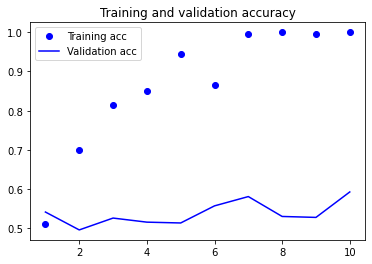

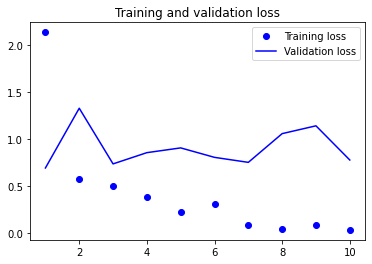

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()